In [8]:
from pathlib import Path

root_img_dir = Path("/local/scratch/datasets/moth-wasp-snake/")
image_paths = []
for root, dirs, paths in root_img_dir.walk():
    for p in paths:
        image_paths.append(str(Path(root) / p))
        
image_paths

['/local/scratch/datasets/moth-wasp-snake/Snake1.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp4.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp2.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake5.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp5.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake2.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp3.png',
 '/local/scratch/datasets/moth-wasp-snake/MothWasp1.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake4.png',
 '/local/scratch/datasets/moth-wasp-snake/Snake3.png']

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#extracted_features = np.load("extracted_features.npy")
np.random.seed(42)  # For reproducibility
extracted_features = np.random.rand(len(image_paths), 50)  # Example feature set with 100 samples and 50 features


normalized_features = StandardScaler().fit_transform(extracted_features)

pca = PCA()
pca_values = pca.fit_transform(normalized_features)


Ploting PCA image: 10it [00:00, 95.76it/s]


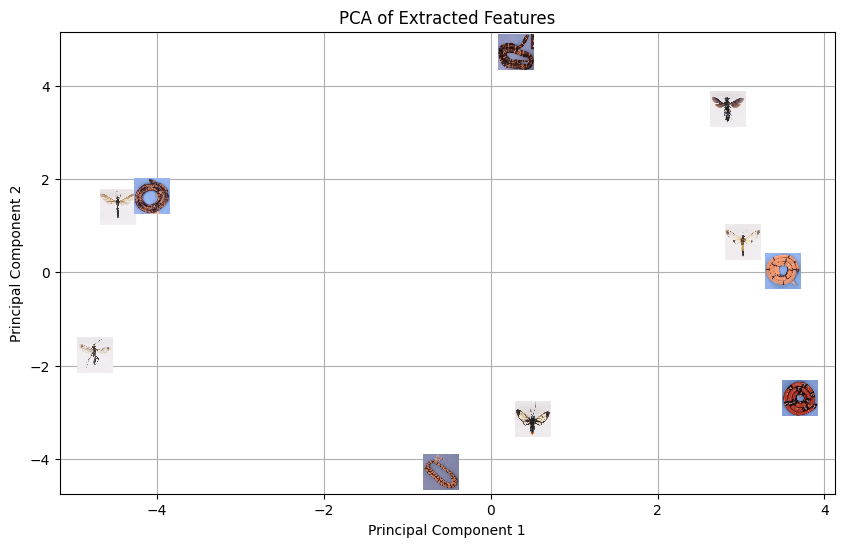

In [12]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from tqdm import tqdm
from PIL import Image

pca_x = 0
pca_y = 1

plt.figure(figsize=(10, 6))
plt.plot(pca_values[:, pca_x], pca_values[:, pca_y], 'o', markersize=2, alpha=0.5)
plt.title("PCA of Extracted Features")
plt.xlabel(f"Principal Component {pca_x + 1}")
plt.ylabel(f"Principal Component {pca_y + 1}")
plt.grid()

PLT_IMG_SIZE = (256, 256)  # Size to which each image will be resized for plotting
for i, path in tqdm(enumerate(image_paths), "Ploting PCA image"):
    image = Image.open(path)
    imagebox = OffsetImage(image.resize(PLT_IMG_SIZE), zoom=0.1)
    ab = AnnotationBbox(imagebox, (pca_values[i, pca_x], pca_values[i, pca_y]),
                    frameon=False, pad=0.5)
    plt.gca().add_artist(ab)



plt.show()